# Trabajo de programación Nº 4

##Instrucciones Generales:

*   Siga las instrucciones del notebook
*   Cambie el Nombre del Archivo, indicando el Nº del trabajo y el número del grupo (para trabajos grupales) o su nombre (para trabajos individuales)
*   Use las celdas de texto, para explicar los objetivos del código y comentar los resultados obtenidos.
*   Use comentarios dentro del código para explicar cómo funciona, por qué usa tal o cual comando, que contienen las variables, etc.
*   Edite la celda siguiente, para completar el nombre, rut y correo del (de los) integrante(s).








## Identificación del (de los) Estudiante(s):
<table>
<tr>
<th> Nombre </th>
<th> RUT </th>
<th> email </th>
</tr>
<tr>
<td> Fabian Trigo </td>
<td> 20.183.107-5 </td>
<td> fabian.trigo@alumnos.uv.cl </td>
</tr>
<tr>
<td> nombre </td>
<td> rut </td>
<td> email </td>
</tr>
<tr>
<td> nombre </td>
<td> rut </td>
<td> email </td>
</tr>
</table>

## Instrucciones específicas
En este trabajo intentaremos estimar el caudal de 3 ríos chilenos en puntos específicos. Los datos fueron tomados del proyecto FONDEF HidroCL y aún mantienen el carácter de reservados, por lo que se prohibe su publicación fuera del ámbito de este curso.

Los datos se encuentran el archivo df_rf_HidroCL_3cuencas.csv, mientras que una descripción de las variables se encuentra en el archivo BaseDatos2023.csv. Las cuencas seleccionadas son:

<table>
<tr><th> gauge_id </th><th> Nombre </th></tr>
<tr><td> 4703002 </td><td> Rio Choapa En Cuncumen </td></tr>
<tr><td> 7330001 </td><td> Rio Perquilauquen En San Manuel </td></tr>
<tr><td> 9127001 </td><td> Rio Muco En Puente Muco </td></tr>
</table>

## Actividad 1: Análisis previo y pre-proceso

Cada modelo se encarga de 

$$
\text{modelo}[\text{input}] \rightarrow \text{output}
$$
- input: una observacion
- output: una prediccion


Benchmarks:
- Persistence: Entrega el ultimo valor observado
$$
\text{persistence}[input] \rightarrow \text{input}
$$

- Climatology: Entrega una prediccion basada en la hstoria para ese dia
$$
\text{persistence}[input, day_j] \rightarrow \langle \text{input} \rangle_{j}
$$
    - el modelo de climatology funcionaria en base a una memoria

## Tarea 1:
Implemente ambos pronósticos y calcule 3 métricas diferentes para ellos.

Analice las variables de entrada al modelo y prepárelas para alimentar los 2 modelos de regresión (machine learning) que utilizará más adelante.

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("df_rf_HidroCL_3cuencas.csv",index_col='gauge_id')

# promedio de lluvia diaria
# asumire que d1_m1d se trata de prediccion para el dia actual
# la otra que use era un forecasted
# pp_f_gfs_pp_mean_b_none_d1_p0d
# y luego
# 'pp_o_imerg_pp_mean_b_none_d1_m1d'
# aunque hay unas variables extras en español que no aparecian con Basin
# si no como caudal, al final del doc
# caudal_mean_p0d

columna_viz = 'pp_o_imerg_pp_mean_b_none_d1_m1d' # probemos visualizar una columna
caudal = 'caudal_mean_p0d'

data = data[['date',columna,caudal]]

#conversion a tipo fecha
data['date'] = pd.to_datetime(data['date'])
data = data.rename(columns={columna_viz:'observed', caudal:'caudal'}) # y a nombres manejables
print('tipos de datos:')
print(data.dtypes)

data.to_csv('data.csv')

tipos de datos:
date        datetime64[ns]
observed           float64
caudal             float64
dtype: object


In [9]:
# los datos parecen mucho pero solo hay 3 cuencas
cuencas = set(data.index)
cuencas = list(cuencas)
print('Cuencas id')
print(cuencas)

# separamos para comodidad al visualizar, date como index es recomendado por otros programadores
id0_dailyRain = data[data.index == cuencas[0]].set_index(['date']) 
id1_dailyRain = data[data.index == cuencas[1]].set_index(['date'])
id2_dailyRain = data[data.index == cuencas[2]].set_index(['date'])

Cuencas id
[9127001, 7330001, 4703002]


### visualizacion de datos simple

In [31]:
# funciones definidas
def yearly_rain(dataset,start, finish):
    year = []
    rain = []
    for i in range(start,finish+1):
        year.append(i)
        rain.append(dataset.loc[str(i), 'observed'].sum() )

    return np.array(year), np.array(rain)

def plot_lluvia_anual(yy0, rr0, width=8, height=4):
    # Configuración de la figura y los ejes
    fig, ax = plt.subplots(figsize=(width, height))

    # Graficar los datos en un gráfico de barras
    sns.barplot(x='Year', y='Rainfall', data=pd.DataFrame({'Year': yy0, 'Rainfall': rr0}), 
        ax=ax, palette='viridis')

    # Rotar las etiquetas del eje x en 90 grados
    plt.xticks(rotation=90)

    # Personalizar el aspecto de la figura
    ax.set_xlabel('Año')
    ax.set_ylabel('Lluvia Total [mm/yr]')

    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim()[0] / 365, ax.get_ylim()[1] / 365)
    ax2.set_yticks(ax.get_yticks() / 365)
    ax2.set_ylabel('Promedio diario de Lluvia [mm/day]')




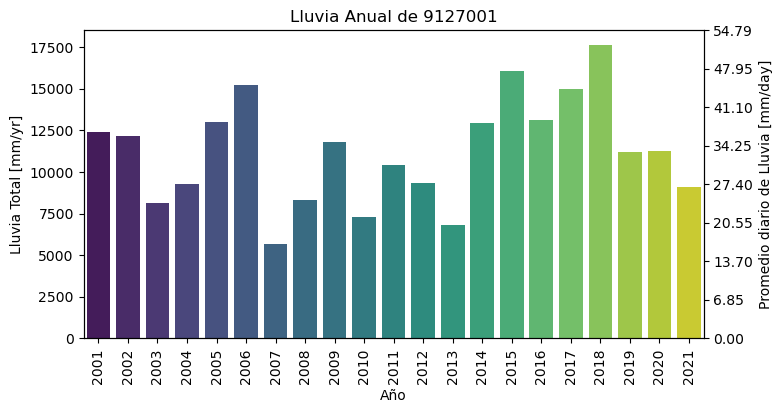

In [32]:
yy0, rr0 = yearly_rain(id0_dailyRain,2001,2021)
plot_lluvia_anual(yy0,rr0)
plt.title('Lluvia Anual de ' + str(cuencas[0]))
plt.show()

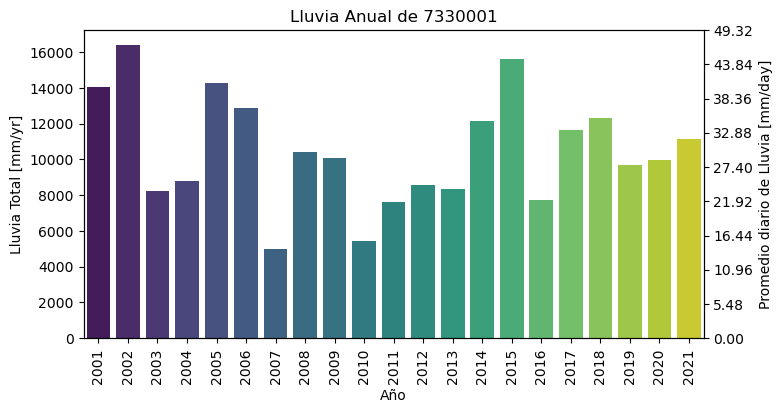

In [33]:
yy0, rr0 = yearly_rain(id1_dailyRain,2001,2021)
plot_lluvia_anual(yy0,rr0)
plt.title('Lluvia Anual de ' + str(cuencas[1]))
plt.show()

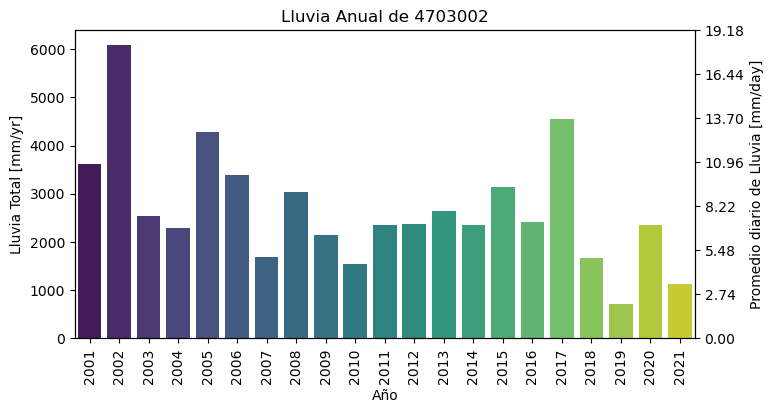

In [34]:
yy0, rr0 = yearly_rain(id2_dailyRain,2001,2021)
plot_lluvia_anual(yy0,rr0)
plt.title('Lluvia Anual de ' + str(cuencas[2]))
plt.show()

### Conseguir promedios diarios

In [10]:
            # groupby agrupa        #dt accede a info       # juntar el aggregate en mean 
daily_avg = data.groupby(data['date'].dt.dayofyear)['observed'].mean()
daily_avg

caudal_daily_avg = data.groupby(data['date'].dt.dayofyear)['caudal'].mean()
caudal_daily_avg

date
1      7.771897
2      7.459586
3      7.197500
4      7.253317
5      7.123333
         ...   
362    9.382508
363    8.837339
364    8.443847
365    8.118797
366    7.936667
Name: caudal, Length: 366, dtype: float64

Verano: desde el 21 de diciembre (solsticio) al 20 de marzo (equinoccio).

Otoño: desde el 20 de marzo (equinoccio) al 21 de junio (solsticio).

Invierno: desde el 21 de junio (solsticio) al 21 de septiembre (equinoccio).

Primavera: desde el 21 de septiembre (equinoccio) al 21 de diciembre (solsticio).

In [2]:
# solo para visualizar ordenandolos en temporadas
# -1 al contar del 0
# +1 si es despues del 29 de febrero

def graficar_temporada(daily_avg):
    """Entregado daily_avg como un pd.Series, se realizan graficos para las temporadas de Chile"""
    davg = list(daily_avg)

    mar20 = 79-1+1
    jun21 = 172-1+1
    sep21 = 264-1+1
    dic21 = 355-1+1
    verano = davg[dic21:] + davg[:mar20]
    otono = davg[mar20:jun21]
    invierno = davg[jun21:sep21]
    primavera = davg[sep21:dic21]

    # print('largo del verano:', len(verano))
    # print('largo del otoño:', len(otono))
    # print('largo del invierno:', len(invierno))
    # print('largo del primavera:', len(primavera))

    assert(len(verano) + len(otono) + len(invierno) + len(primavera) == len(daily_avg))

    # convertirlos a array para llenar un heatmap
    verano = np.array(verano + [np.nan for i in range(98-len(verano))])
    otono = np.array(otono + [np.nan for i in range(98-len(otono))])
    invierno = np.array(invierno + [np.nan for i in range(98-len(invierno))])
    primavera = np.array(primavera + [np.nan for i in range(98-len(primavera))])

    # Dividir la matriz en 4 secciones para representar las estaciones
    shapeh, shapev = -1, 7
    verano = verano.reshape((shapeh, shapev))
    primavera = primavera.reshape((shapeh, shapev))
    otono = otono.reshape((shapeh, shapev))
    invierno = invierno.reshape((shapeh, shapev))

    # Configurar el tamaño de la figura y los subgráficos
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Configurar los títulos de los subgráficos
    axs[0, 0].set_title('Primavera')
    axs[0, 1].set_title('Verano')
    axs[1, 0].set_title('Otoño')
    axs[1, 1].set_title('Invierno')

    # Crear los mapas de calor para cada estación
    sns.heatmap(primavera, cmap='YlGnBu', cbar=True, ax=axs[0, 0], linewidths=0.5)
    sns.heatmap(verano, cmap='YlGnBu', cbar=True, ax=axs[0, 1], linewidths=0.5)
    sns.heatmap(otono, cmap='YlGnBu', cbar=True, ax=axs[1, 0], linewidths=0.5)
    sns.heatmap(invierno, cmap='YlGnBu', cbar=True, ax=axs[1, 1], linewidths=0.5)

    # Ajustar los espacios entre subgráficos
    plt.tight_layout()

    return fig,axs

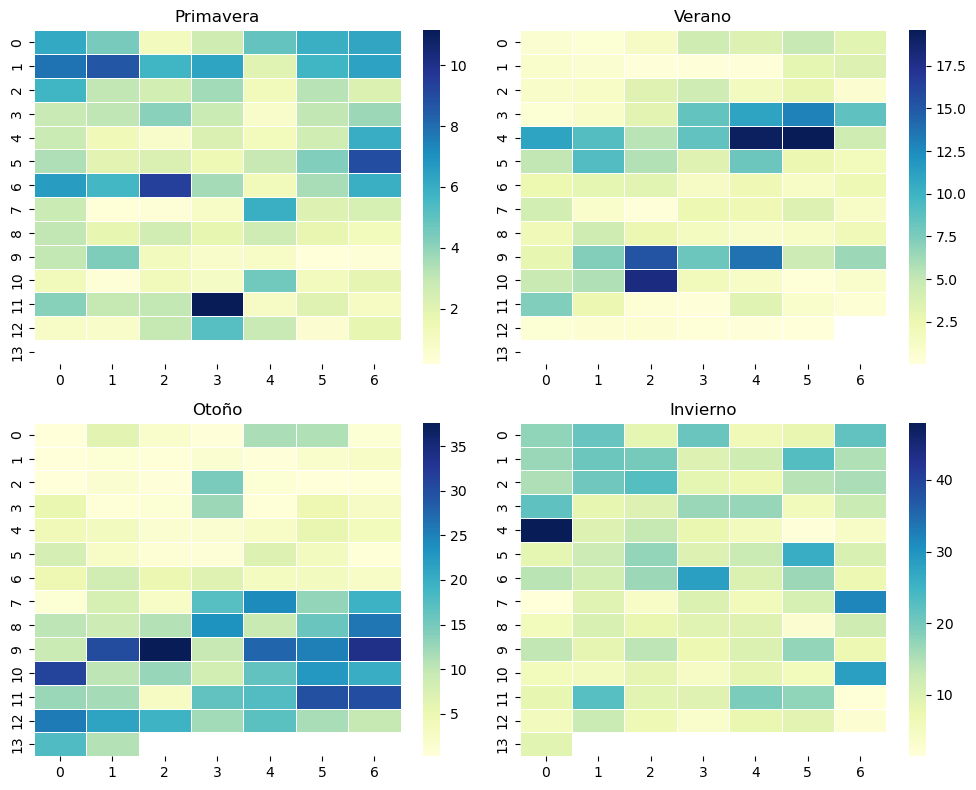

In [50]:
# Nacional
            # groupby agrupa        #dt accede a info       # juntar el aggregate en mean 
daily_avg = data.groupby(data['date'].dt.dayofyear)['observed'].mean()

graficar_temporada(daily_avg)
plt.show()

Datos para 9127001


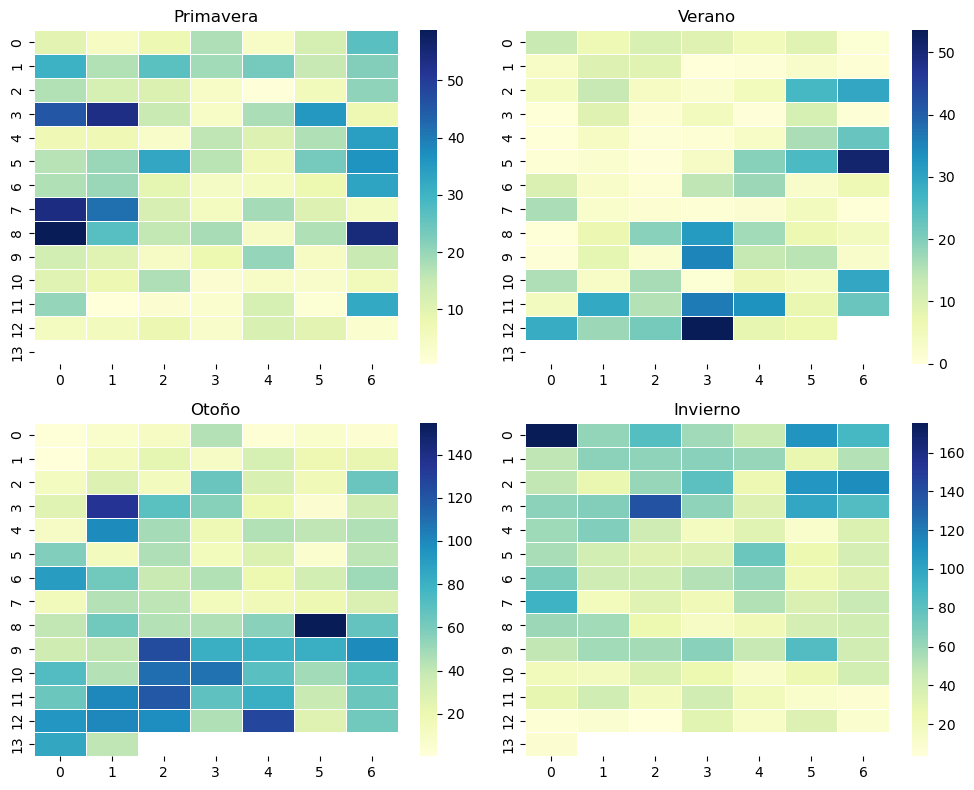

In [51]:
avg_id0 = id0_dailyRain.groupby(id0_dailyRain.index.dayofyear)['observed'].mean()

graficar_temporada(avg_id0)
print('Datos para '+ str(cuencas[0]))
plt.show()


Datos para 7330001


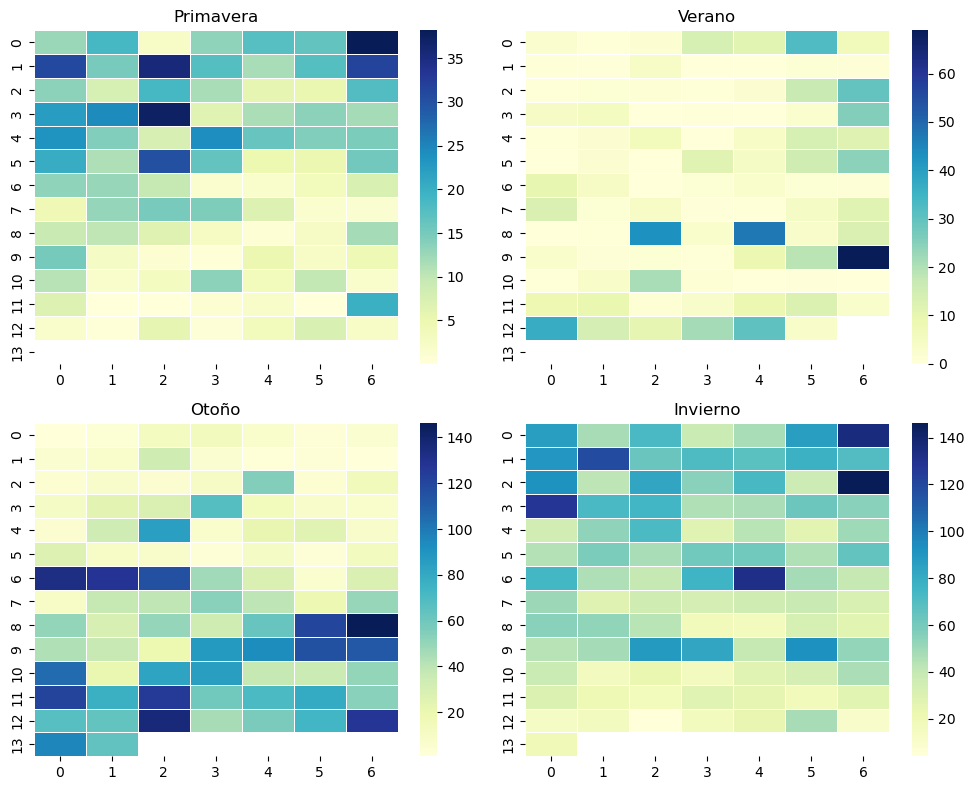

In [52]:
avg_id1 = id1_dailyRain.groupby(id1_dailyRain.index.dayofyear)['observed'].mean()

graficar_temporada(avg_id1)
print('Datos para '+ str(cuencas[1]))
plt.show()

Datos para 4703002


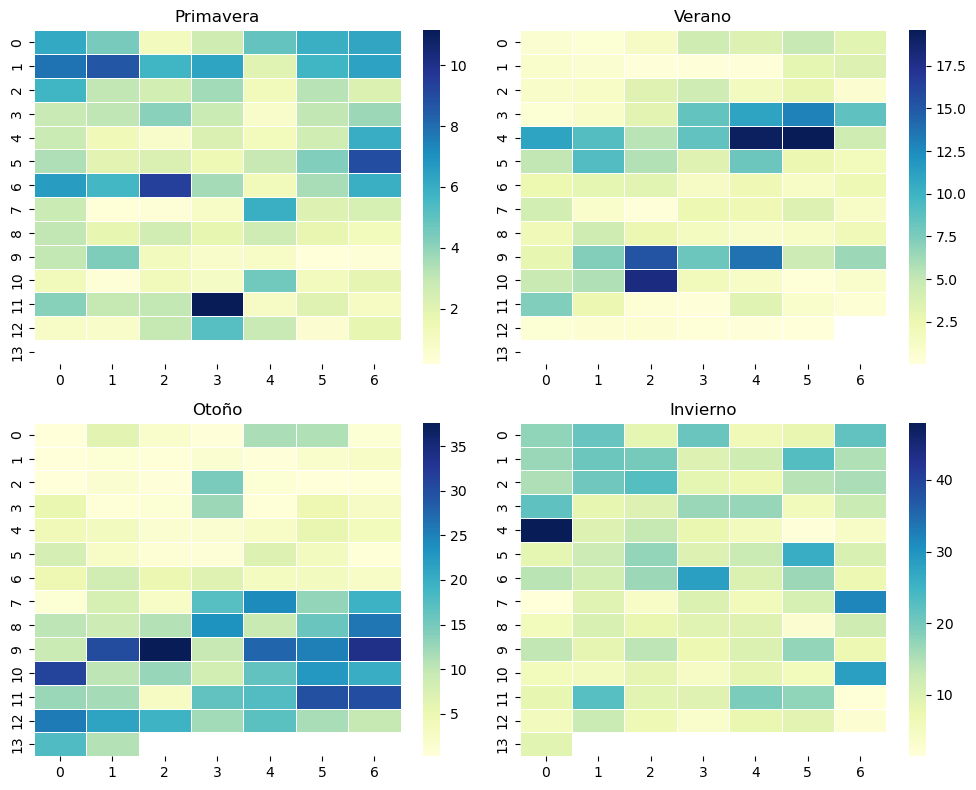

In [53]:
avg_id2 = id2_dailyRain.groupby(id2_dailyRain.index.dayofyear)['observed'].mean()

graficar_temporada(avg_id2)
print('Datos para '+ str(cuencas[2]))
plt.show()

Para caudales

In [11]:
avg_id0 = id0_dailyRain.groupby(id0_dailyRain.index.dayofyear)['caudal'].mean()
avg_id1 = id1_dailyRain.groupby(id1_dailyRain.index.dayofyear)['caudal'].mean()
avg_id2 = id2_dailyRain.groupby(id2_dailyRain.index.dayofyear)['caudal'].mean()

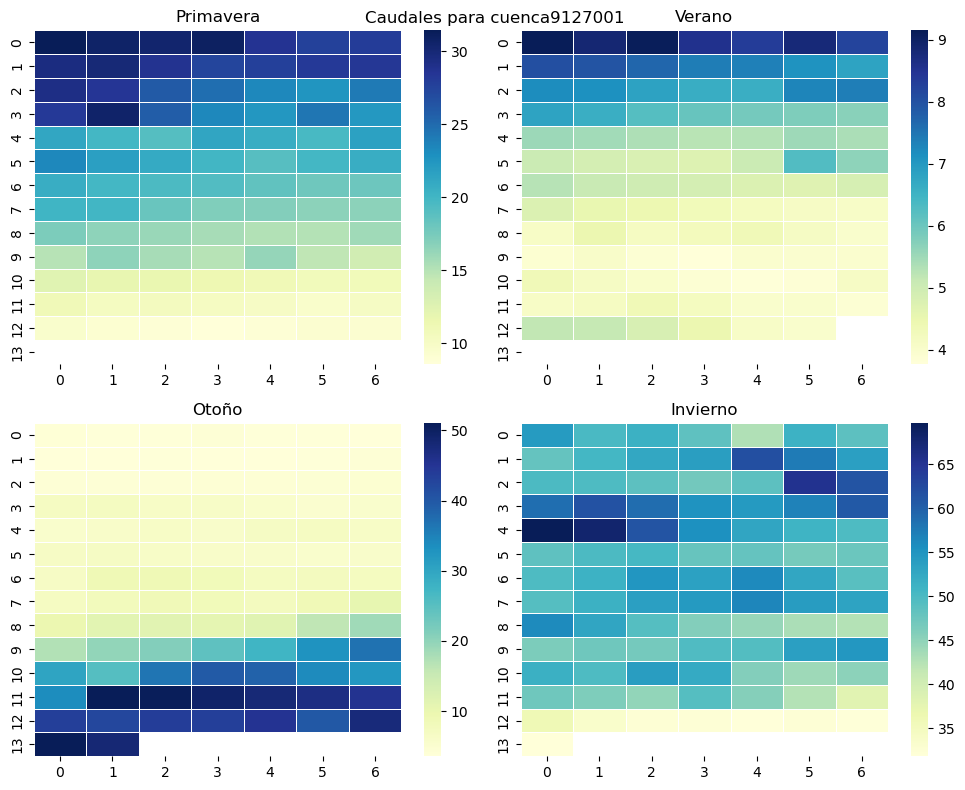

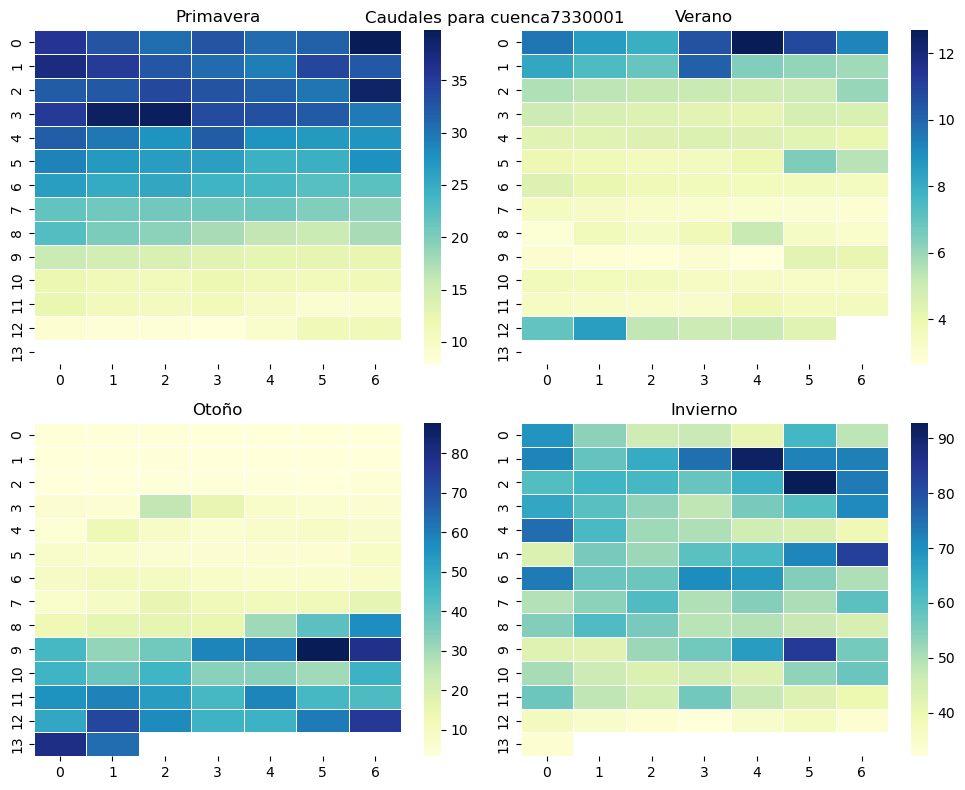

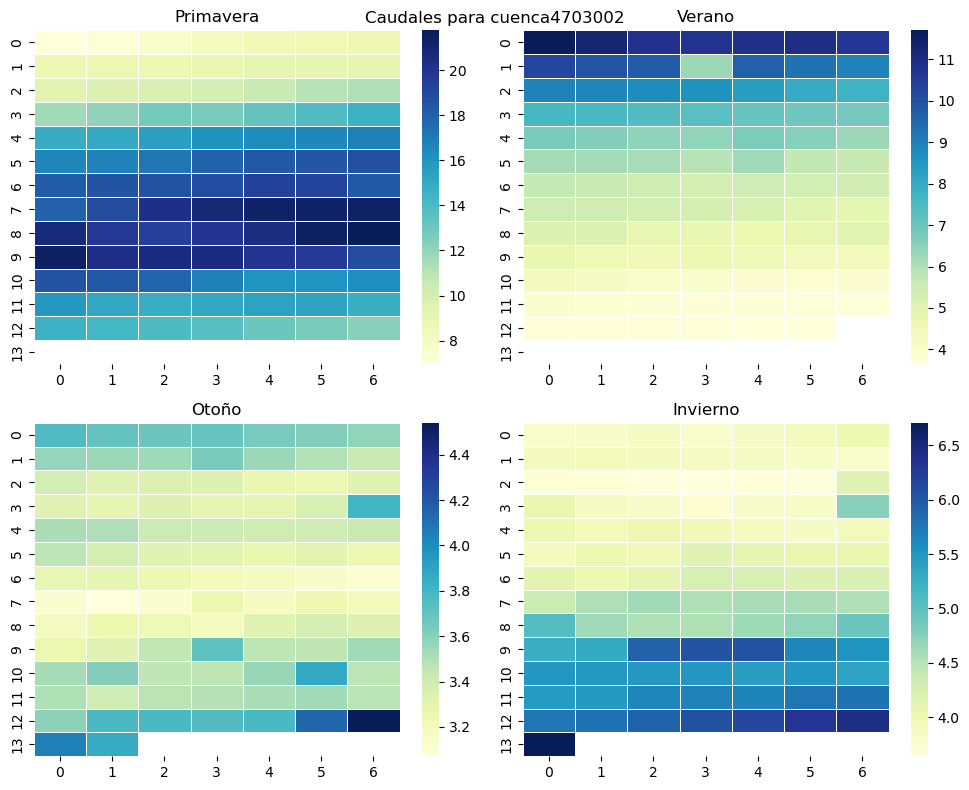

In [63]:
fontsize = 16

fig, axv = graficar_temporada(avg_id0)
fig.suptitle(f'Caudales para cuenca{cuencas[0]}')
plt.show()

fig, axv = graficar_temporada(avg_id1)
fig.suptitle(f'Caudales para cuenca{cuencas[1]}')
plt.show()

fig, axv = graficar_temporada(avg_id2)
fig.suptitle(f'Caudales para cuenca{cuencas[2]}')
plt.show()

### Limpieza de datos

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import warnings

base = './data/'
data = pd.read_csv("df_rf_HidroCL_3cuencas.csv")

#conversion a tipo fecha
data['date'] = pd.to_datetime(data['date'])
data = data.rename(columns={'caudal_mean_p0d':'observed'}) # y a nombres manejables

# separamos para comodidad al visualizar, date como index es recomendado por otros programadores
id0_dailyRain = data[data["gauge_id"] == 9127001].drop("gauge_id", axis=1)
id1_dailyRain = data[data["gauge_id"] == 7330001].drop("gauge_id", axis=1)
id2_dailyRain = data[data["gauge_id"] == 4703002].drop("gauge_id", axis=1)

# quitar caudales
new_index = 267
columna0 = id0_dailyRain.pop('observed')
id0_dailyRain.insert(new_index, 'observed', columna0)
columna1 = id1_dailyRain.pop('observed')
id1_dailyRain.insert(new_index, 'observed', columna1)
columna2 = id2_dailyRain.pop('observed')
id2_dailyRain.insert(new_index, 'observed', columna2)

delete_to = -10
id0_dailyRain=id0_dailyRain.iloc[:, :delete_to]
id1_dailyRain=id1_dailyRain.iloc[:, :delete_to]
id2_dailyRain=id2_dailyRain.iloc[:, :delete_to]
id0_dailyRain.columns
# Datos sin NAN
id0_dailyRain=id0_dailyRain.dropna()
id1_dailyRain=id1_dailyRain.dropna()
id2_dailyRain=id2_dailyRain.dropna()
# Convertir la columna de fechas a formato de fecha adecuado si es necesario
id0_dailyRain['date'] = pd.to_datetime(id0_dailyRain['date'])
id1_dailyRain['date'] = pd.to_datetime(id1_dailyRain['date'])
id2_dailyRain['date'] = pd.to_datetime(id2_dailyRain['date'])

# Ordenar los datos por fecha ascendente
id0_dailyRain = id0_dailyRain.sort_values('date')
id1_dailyRain = id1_dailyRain.sort_values('date')
id2_dailyRain = id2_dailyRain.sort_values('date')

date0 = id0_dailyRain['date']
date1 = id1_dailyRain['date']
date2 = id2_dailyRain['date']


# Se eliminan las columnas de fechas
# id0_dailyRain_nd=id0_dailyRain.drop('date', axis=1)
# id1_dailyRain_nd=id1_dailyRain.drop('date', axis=1)
# id2_dailyRain_nd=id2_dailyRain.drop('date', axis=1)


In [25]:
X0=id0_dailyRain.drop('observed', axis=1)
y0=id0_dailyRain['observed']

X1=id1_dailyRain.drop('observed', axis=1)
y1=id1_dailyRain['observed']

X2=id2_dailyRain.drop('observed', axis=1)
y2=id2_dailyRain['observed']

## Machine Learning, dividir en train,test,val

In [79]:
#Se utiliza la función train_test_split para dividir el conjunto de datos en conjuntos de entrenamiento, validación y testeo
X0_train, X0_test_val, y0_train, y0_test_val = train_test_split(X0, y0, test_size=0.3, random_state=42)
X0_val, X0_test, y0_val, y0_test = train_test_split(X0_test_val, y0_test_val, test_size=0.5, random_state=42)
print("Río Muco En Puente Muco:")
print("Proporción de entrenamiento:", round(len(X0_train) / len(X0), 2))
print("Proporción de validación:", round(len(X0_val) / len(X0), 2))
print("Proporción de testeo:", round(len(X0_test) / len(X0), 2))
print("\n")
#Se utiliza la función train_test_split para dividir el conjunto de datos en conjuntos de entrenamiento, validación y testeo
X1_train, X1_test_val, y1_train, y1_test_val = train_test_split(X1, y1, test_size=0.3, random_state=42)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_test_val, y1_test_val, test_size=0.5, random_state=42)
print("Río Perquilauquen En San Manuel:")
print("Proporción de entrenamiento:", round(len(X1_train) / len(X1), 2))
print("Proporción de validación:", round(len(X1_val) / len(X1), 2))
print("Proporción de testeo:", round(len(X1_test) / len(X1), 2))
print("\n")
#Se utiliza la función train_test_split para dividir el conjunto de datos en conjuntos de entrenamiento, validación y testeo
X2_train, X2_test_val, y2_train, y2_test_val = train_test_split(X2, y2, test_size=0.3, random_state=42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_test_val, y2_test_val, test_size=0.5, random_state=42)
print("Río Choapa En Cuncumen:")
print("Proporción de entrenamiento:", round(len(X2_train) / len(X2), 2))
print("Proporción de validación:", round(len(X2_val) / len(X2), 2))
print("Proporción de testeo:", round(len(X2_test) / len(X2), 2))

Río Muco En Puente Muco:
Proporción de entrenamiento: 0.7
Proporción de validación: 0.15
Proporción de testeo: 0.15


Río Perquilauquen En San Manuel:
Proporción de entrenamiento: 0.7
Proporción de validación: 0.15
Proporción de testeo: 0.15


Río Choapa En Cuncumen:
Proporción de entrenamiento: 0.7
Proporción de validación: 0.15
Proporción de testeo: 0.15


### Creando el sistema de Persistencia y Climatologia

Primero como funcionaran los datos en este notebook, se separará en training y target, el pasado y el futuro respectivamente;

para que se

In [65]:
class ModeloBenchmark():
    """ model_type = 'persistence' | 'climatology' """
    def __init__(self, model_type='climatology'):
        self.model_type = model_type
        self.memory = None

    def train(self,X_train_fechas, y_train):
        """ numpy array input para guardar en la memoria """
        memory = pd.DataFrame()
        memory['date'] = X_train_fechas
        memory['observed'] = y_train
        average_memory = memory.groupby(memory.date.dt.dayofyear).mean()
        self.memory = average_memory
        print('Training completo')

    def predict_once(self,last_date, last_caudal):
        """ predice en base al sigueinte dia
         model_type = 'persistence' | 'climatology'
         return -> float"""

        predict_date = last_date + pd.DateOffset(days=1)

        if self.model_type == 'persistence': #entrega la ultima lluvia
            return last_caudal
        if self.model_type == 'climatology': # promedio de lluvias en base al dia del año
            average_memory = self.memory
            caudal_prediction = average_memory[predict_date.dayofyear == average_memory.index].values[0,0]
            return caudal_prediction

    def predict(self,last_date, last_caudal,ammount=8): # ammount: datos a predecir
        """input como np.array 2D"""
        # legacy code: gauge = [input[-1,0] for i in range(ammount)] # repetir gaude_id varias veces
        fechas = pd.period_range(last_date, periods=ammount, freq='D')
        fechas = [dia.to_timestamp() for dia in fechas]
        caudales = []

        for dia in fechas:
            caudales.append(
                self.predict_once(dia, last_caudal)
            )

        # legacy code: return np.array(list(zip(gauge, list(fechas), caudales)))
        return np.array(list(zip(list(fechas), caudales)))




        

In [66]:
modelP = ModeloBenchmark('persistence')
modelC = ModeloBenchmark('climatology')
modelC.train(X0_train['date'], y0_train)
modelP.train(X0_train['date'], y0_train)
# ejemplo de predicción
modelP.predict_once(X0_train['date'].iloc[1], y0_train.iloc[1])

Training completo
Training completo


39.5

In [67]:
modelP.predict(X0_train['date'].iloc[1], y0_train.iloc[1])

array([[Timestamp('2020-07-08 00:00:00'), 39.5],
       [Timestamp('2020-07-09 00:00:00'), 39.5],
       [Timestamp('2020-07-10 00:00:00'), 39.5],
       [Timestamp('2020-07-11 00:00:00'), 39.5],
       [Timestamp('2020-07-12 00:00:00'), 39.5],
       [Timestamp('2020-07-13 00:00:00'), 39.5],
       [Timestamp('2020-07-14 00:00:00'), 39.5],
       [Timestamp('2020-07-15 00:00:00'), 39.5]], dtype=object)

In [68]:
modelC.predict(X0_train['date'].iloc[1], y0_train.iloc[1])

array([[Timestamp('2020-07-08 00:00:00'), 45.423571428571435],
       [Timestamp('2020-07-09 00:00:00'), 75.79454545454546],
       [Timestamp('2020-07-10 00:00:00'), 58.48733333333334],
       [Timestamp('2020-07-11 00:00:00'), 65.36],
       [Timestamp('2020-07-12 00:00:00'), 57.473333333333336],
       [Timestamp('2020-07-13 00:00:00'), 59.14375],
       [Timestamp('2020-07-14 00:00:00'), 57.13125],
       [Timestamp('2020-07-15 00:00:00'), 58.48181818181818]],
      dtype=object)

# Actividad 2: Random Forest
Construya un modelo de Random Forest para cada una de las cuencas incluidas en el dataset. Encuentre hiperparámetros y un conjunto de variables que permita superar el rendimiento de los modelos de benchmark. Si no logra un mejor modelo, discuta el porqué.

In [80]:
X0_train_d = X0_train
X0_train = X0_train.drop('date', axis=1)
X1_train_d = X1_train
X1_train = X1_train.drop('date', axis=1)
X2_train_d = X2_train
X2_train = X2_train.drop('date', axis=1)

X0_val_d = X0_val
X0_val = X0_val.drop('date', axis=1)
X1_val_d = X1_val
X1_val = X1_val.drop('date', axis=1)
X2_val_d = X2_val
X2_val = X2_val.drop('date', axis=1)

X0_test_d = X0_test
X0_test = X0_test.drop('date', axis=1)
X1_test_d = X1_test
X1_test = X1_test.drop('date', axis=1)
X2_test_d = X2_test
X2_test = X2_test.drop('date', axis=1)

### Modelo Machine Learning

**Se construye el modelo de Random Forest Regression:**

In [81]:
model = RandomForestRegressor(random_state=42)  
#Se construye un objeto RandomForestRegressor() que representa el modelo de regresión de Random Forest

In [82]:
# Se define el diccionario param_grid que contiene las combinaciones de valores de hiperparámetros que se probarán durante la búsqueda.
param_grid = {'n_estimators': [50], 'max_depth': [5, 10], 'min_samples_split': [10, 15], 'min_samples_leaf': [5, 10], 'max_features': ['auto','sqrt','log2']}

Se crea el diccionario con los hiperparámetros a ajustar siendo estos los siguientes:

n_estimators: Indica el número de árboles de decisión que se crearán en el random forest regression.

max_depth: Establece la profundidad máxima permitida para cada árbol en el bosque. Controla la cantidad de divisiones que se realizan en cada árbol y, por lo tanto, el nivel de complejidad del modelo.

min_samples_split: Especifica el número mínimo de muestras requeridas para dividir un nodo interno en un árbol de decisión.

min_samples_leaf: Establece el número mínimo de muestras requeridas en un nodo terminal.

max_feature: Determina la cantidad de características que se considerarán al buscar la mejor división en cada nodo del árbol.

**Se realiza la búsqueda de los mejores hiperparámetros con validación cruzada:**

In [83]:
grid_search0 = GridSearchCV(estimator=model, param_grid=param_grid, cv=5 ,scoring='r2')
grid_search1 = GridSearchCV(estimator=model, param_grid=param_grid, cv=5 ,scoring='r2')
grid_search2 = GridSearchCV(estimator=model, param_grid=param_grid, cv=5 ,scoring='r2')
#Se utiliza GridSearchCV para realizar una búsqueda exhaustiva de hiperparámetros con validación cruzada y encontrar la mejor combinación de hiperparámetros para el modelo de regresión de Random Forest.

#Dentro del GridSearchCV se utilizan los siguientes parámetros:

#estimator=randomforestreg: Se especifica el estimador base que se utilizará en la búsqueda de hiperparámetros. En este caso, se utiliza el modelo de regresión de Random Forest.

#param_grid=param_grid: Se especifica el diccionario param_grid que contiene las combinaciones de valores para los hiperparámetros que se probarán durante la búsqueda.
#Cada combinación de valores se utilizará para ajustar y evaluar el modelo.

#cv=5: Se especifica el esquema de validación cruzada que se utilizará durante la búsqueda de hiperparámetros. En este caso, se utiliza una validación cruzada de 5 folds.

#scoring='r2': Se especifica la métrica de evaluación que se utilizará para seleccionar el mejor modelo.
#Se utiliza 'r2' que es el coeficiente de determinación (R²).

warnings.filterwarnings("ignore")
grid_search0.fit(X0_train, y0_train)
grid_search1.fit(X1_train, y1_train)
grid_search2.fit(X2_train, y2_train)
#Se utiliza fit para ajustar y evaluar múltiples modelos de de regresión de Random Forest con diferentes combinaciones de hiperparámetros utilizando validación cruzada.

#Se obtienen los mejores hiperparámetros y el mejor modelo
best_params0 = grid_search0.best_params_ #se utiliza best_params_ para obtener los mejores valores hiperparámetros obtenidos de grid_search
best_model0 = grid_search0.best_estimator_ #Se utiliza best_estimator_ para obtener el mejor modelo que se ajuste a los datos utilizando los mejores hiperparámetros.

best_params1 = grid_search1.best_params_ #se utiliza best_params_ para obtener los mejores valores hiperparámetros obtenidos de grid_search
best_model1 = grid_search1.best_estimator_ #Se utiliza best_estimator_ para obtener el mejor modelo que se ajuste a los datos utilizando los mejores hiperparámetros.

best_params2 = grid_search2.best_params_ #se utiliza best_params_ para obtener los mejores valores hiperparámetros obtenidos de grid_search
best_model2 = grid_search2.best_estimator_ #Se utiliza best_estimator_ para obtener el mejor modelo que se ajuste a los datos utilizando los mejores hiperparámetros.

print('Mejores hiperparámetros para el Rio Muco En Puente Muco:', best_params0)
print('Mejores hiperparámetros para el Rio Perquilauquen En San Manuel:', best_params1)
print('Mejores hiperparámetros para el Rio Choapa En Cuncumen:', best_params2)

Mejores hiperparámetros para el Rio Muco En Puente Muco: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
Mejores hiperparámetros para el Rio Perquilauquen En San Manuel: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
Mejores hiperparámetros para el Rio Choapa En Cuncumen: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [84]:
# Crear los modelos
# **dictionary, es una manera de pasar argumentos de manera comoda y pythonica a una función
best_model0 = RandomForestRegressor(**best_params0) 
best_model1 = RandomForestRegressor(**best_params1) 
best_model2 = RandomForestRegressor(**best_params2) 

In [85]:
%%time
best_model0.fit(X0_train, y0_train)
best_model1.fit(X1_train, y1_train)
best_model2.fit(X2_train, y2_train)

Wall time: 2min 7s


RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=50)

Se obtuvo que los mejores hiperparámetros obtenidos utiliza max_depth: 20, min_samples_leaf: 5, min_samples_split: 10, n_estimators: 50 y max_features: 'auto' para los 3 rios.

### **Prediccion y evaluación de los conjuntos de testeo, validación y entrenamiento:**

 **Río Muco En Puente Muco:**

In [87]:
# utilizado en lugar del MAPE, pues no explota con valores = 0
# y otra ventaja del error logaritmico, es que es capaz de 
# penalizar tanto los valores grandes como los valores pequeños
# pues el error cuadratico medio los errores pequeños no los penalizaria tanto

from sklearn.metrics import mean_squared_log_error

In [88]:
def medir_error(X0_val, X0_test, X0_train, y0_val, y0_test, y0_train, best_model0, rio):
    metrica1 = mean_absolute_error #mae
    metrica2 = mean_squared_error # mse
    metrica3 = mean_squared_log_error
    nombre_metrica3 = "Error Cuadratico Medio Logaritmico"


    #Se utiliza la función predict() para generar predicciones utilizando el mejor modelo obtenido sobre los conjuntos de validación, testeo y entrenamiento
    predictions_val = best_model0.predict(X0_val)
    predictions_test = best_model0.predict(X0_test)
    predictions_train = best_model0.predict(X0_train)

    #Se calculan diferentes métricas de evaluación para las predicciones realizadas por el modelo en el conjunto de validación.
    mae_val = metrica1(y0_val, predictions_val) #se utiliza la función mean_absolute_error para calcula el error absoluto medio entre los valores reales (y_val) y las predicciones (predictions_val)
    mse_val = metrica2(y0_val, predictions_val) #se utiliza la función mean_squared_error para calcula el error cuadrático medio entre los valores reales (y_val) y las predicciones (predictions_val)
    mape_val = metrica3(y0_val, predictions_val)
    r2_val = r2_score(y0_val, predictions_val) #se utiliza la función r2_score para calcula el coeficiente de determinación (R²) entre los valores reales (y_val) y las predicciones (predictions_val)

    #Se calculan diferentes métricas de evaluación para las predicciones realizadas por el modelo en el conjunto de testeo.
    mae_test = metrica1(y0_test, predictions_test)
    mse_test = metrica2(y0_test, predictions_test)
    mape_test = metrica3(predictions_test, y0_test)
    r2_test = r2_score(y0_test, predictions_test)

    #Se calculan diferentes métricas de evaluación para las predicciones realizadas por el modelo en el conjunto de entrenamiento.
    mae_train = metrica1(y0_train, predictions_train)
    mse_train = metrica2(y0_train, predictions_train)
    mape_train = metrica3(y0_train, predictions_train)
    r2_train = r2_score(y0_train, predictions_train)
    print(f"{rio}")
    print("Conjunto de validación")
    print('Error Absoluto Medio (MAE):', round(mae_val, 3))
    print('Error Cuadrático Medio (MSE):', round(mse_val, 3))
    print(f'{nombre_metrica3}:', round(mape_val, 3))
    print('Coeficiente de determinación (R²):', round(r2_val, 3))
    sns.histplot(predictions_val - y0_val)
    plt.title('Distribución de Erores, Validación')
    plt.show()
    print("\n")

    print("Conjunto de testeo")
    print('Error Absoluto Medio (MAE):', round(mae_test, 3))
    print('Error Cuadrático Medio (MSE):', round(mse_test, 3))
    print(f'{nombre_metrica3}:', round(mape_test, 3))
    print('Coeficiente de determinación (R²):', round(r2_test, 3))
    sns.histplot(predictions_test - y0_test)
    plt.title('Distribución de Erores, Testeo')
    plt.show()
    print("\n")

    print("Conjunto de entrenamiento")
    print('Error Absoluto Medio (MAE):', round(mae_train, 3))
    print('Error Cuadrático Medio (MSE):', round(mse_train, 3))
    print(f'{nombre_metrica3}:', round(mape_train, 3))
    print('Coeficiente de determinación (R²):', round(r2_train, 3)) 
    sns.histplot(predictions_train - y0_train)
    plt.title('Distribución de Erores, Entrenamiento')
    plt.show()


Río Muco
Conjunto de validación
Error Absoluto Medio (MAE): 4.741
Error Cuadrático Medio (MSE): 128.123
Error Cuadratico Medio Logaritmico: 0.057
Coeficiente de determinación (R²): 0.815


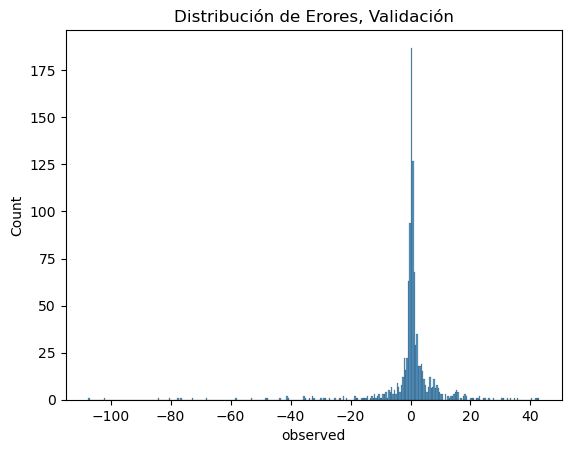



Conjunto de testeo
Error Absoluto Medio (MAE): 4.725
Error Cuadrático Medio (MSE): 113.071
Error Cuadratico Medio Logaritmico: 0.056
Coeficiente de determinación (R²): 0.837


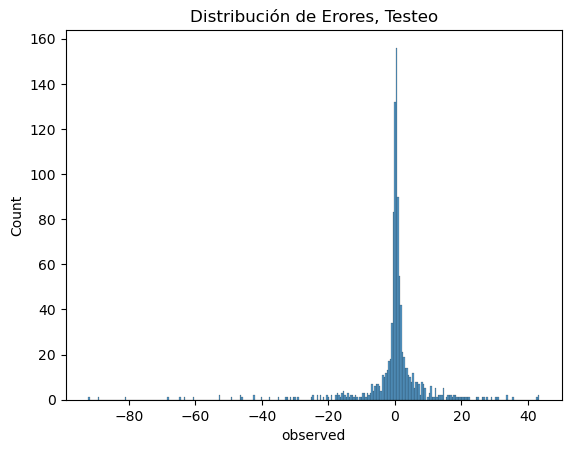



Conjunto de entrenamiento
Error Absoluto Medio (MAE): 3.235
Error Cuadrático Medio (MSE): 56.07
Error Cuadratico Medio Logaritmico: 0.026
Coeficiente de determinación (R²): 0.93


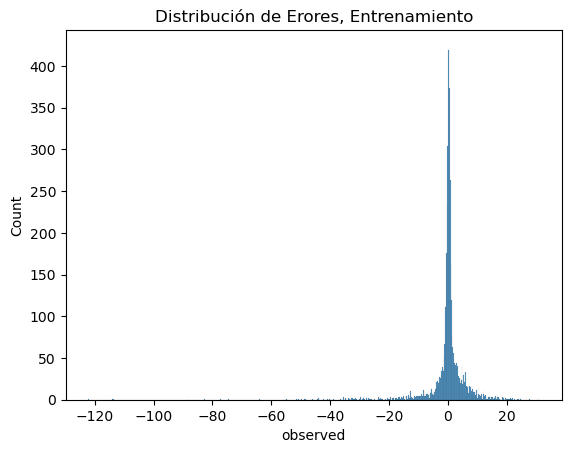

In [89]:
rio = "Río Muco"
medir_error(X0_val, X0_test, X0_train, y0_val, y0_test, y0_train, best_model0, rio)

**Río Perquilauquen En San Manuel:**

Río Perquilauquen En San Manuel:
Río Perquilauquen
Conjunto de validación
Error Absoluto Medio (MAE): 9.22
Error Cuadrático Medio (MSE): 895.186
Error Cuadratico Medio Logaritmico: 0.142
Coeficiente de determinación (R²): 0.68


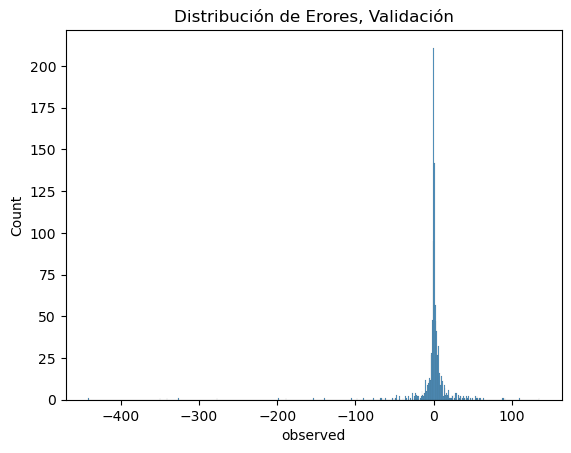



Conjunto de testeo
Error Absoluto Medio (MAE): 7.749
Error Cuadrático Medio (MSE): 569.589
Error Cuadratico Medio Logaritmico: 0.132
Coeficiente de determinación (R²): 0.747


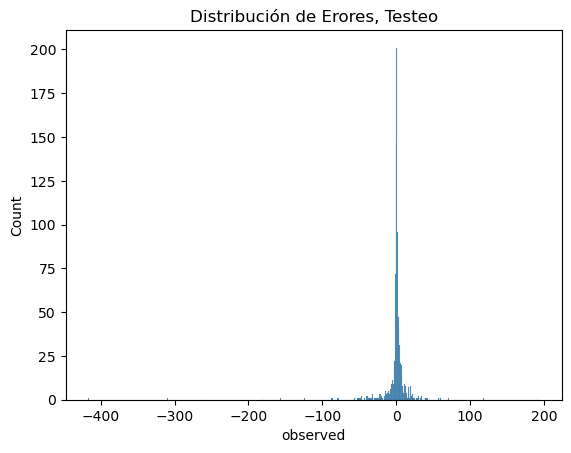



Conjunto de entrenamiento
Error Absoluto Medio (MAE): 4.922
Error Cuadrático Medio (MSE): 186.156
Error Cuadratico Medio Logaritmico: 0.069
Coeficiente de determinación (R²): 0.898


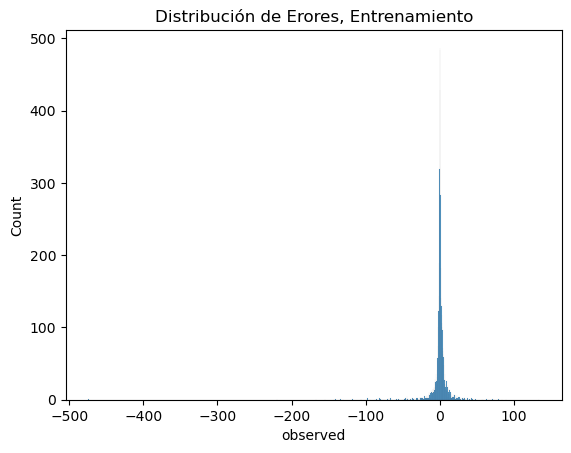

In [90]:
rio1 = "Río Perquilauquen"
print("Río Perquilauquen En San Manuel:")
medir_error(X1_val, X1_test, X1_train, y1_val, y1_test, y1_train, best_model1, rio1)

**Río Choapa En Cuncumen:**

Río Choapa En Cuncumen:
Río Choapa
Conjunto de validación
Error Absoluto Medio (MAE): 0.831
Error Cuadrático Medio (MSE): 3.623
Error Cuadratico Medio Logaritmico: 0.014
Coeficiente de determinación (R²): 0.959


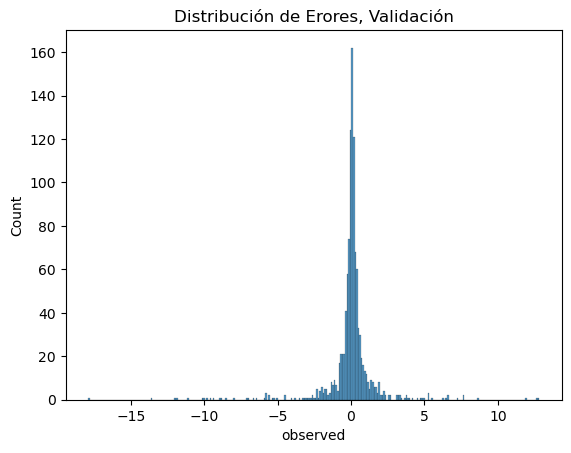



Conjunto de testeo
Error Absoluto Medio (MAE): 0.77
Error Cuadrático Medio (MSE): 2.805
Error Cuadratico Medio Logaritmico: 0.013
Coeficiente de determinación (R²): 0.967


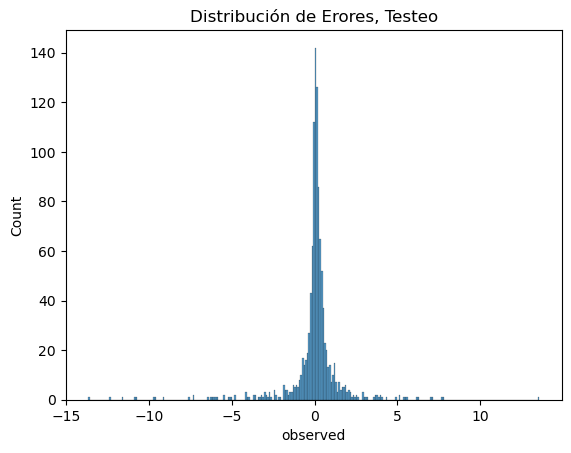



Conjunto de entrenamiento
Error Absoluto Medio (MAE): 0.486
Error Cuadrático Medio (MSE): 1.055
Error Cuadratico Medio Logaritmico: 0.006
Coeficiente de determinación (R²): 0.988


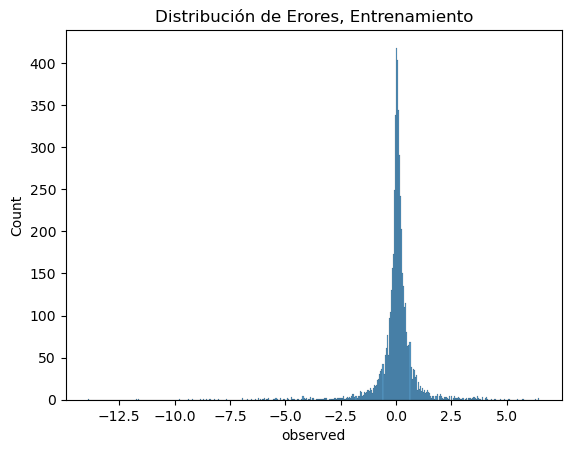

In [91]:
rio2 = "Río Choapa"
print("Río Choapa En Cuncumen:")
medir_error(X2_val, X2_test, X2_train, y2_val, y2_test, y2_train, best_model2, rio2)

# Actividad 3: Redes Neuronales
Construya un modelo de redes neuronales para cada una de las cuencas del archivo de datos. Encuentre una estructura (justifíquela), conjunto de variables e hiperparámetros que superen los benchmarks. Si no consigue superarlos, discuta posibles razones.